In [5]:
import pandas as pd
import numpy as np
import datetime
from scipy.stats import norm


# Generate a synthetic dataset for stock prices and options data


In [6]:
# Set the seed for reproducibility
np.random.seed(42)

# Generate date range for one year of data (252 trading days)
dates = pd.bdate_range(start="2023-01-01", end="2023-12-31", freq='B')

# Generate synthetic stock prices using a geometric Brownian motion model
initial_price = 100  # initial stock price
mu = 0.02 # drift
sigma = 0.08  # volatility
n = len(dates)

# Generate stock prices
stock_prices = [initial_price]
for _ in range(1, n):
    dt = 1/252  # time step (1 trading day)
    price_change = mu * dt + sigma * np.sqrt(dt) * np.random.normal()
    stock_prices.append(stock_prices[-1] * np.exp(price_change))

# Create a DataFrame for stock prices
stock_data = pd.DataFrame({'Date': dates, 'Stock Price': stock_prices})

# Generate synthetic options data (European call and put options)
strike_prices = [90, 100, 110]
maturities = [30, 60, 90]  # Days to maturity
risk_free_rate = 0.02  # annual interest rate

# Define the Black-Scholes formula for call and put option pricing
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Generate synthetic implied volatility as a "volatility smile"
def implied_volatility_smile(K, S):
    # Simulate a volatility smile where out-of-the-money and in-the-money options have higher volatility
    if K < S * 0.95:  # Deep in-the-money
        return 0.35
    elif K > S * 1.05:  # Deep out-of-the-money
        return 0.35
    else:  # At-the-money
        return 0.2

# Regenerate the options data using the Black-Scholes model and implied volatility
new_options_data = []

for strike in strike_prices:
    for maturity in maturities:
        for date in dates:
            stock_price = stock_data.loc[stock_data['Date'] == date, 'Stock Price'].values[0]
            time_to_maturity = maturity / 365.0
            option_type = 'Call' if np.random.rand() > 0.5 else 'Put'
            volatility = implied_volatility_smile(strike, stock_price)
            
            if option_type == 'Call':
                premium = black_scholes_call(stock_price, strike, time_to_maturity, risk_free_rate, volatility)
            else:
                premium = black_scholes_put(stock_price, strike, time_to_maturity, risk_free_rate, volatility)
            
            new_options_data.append([date, strike, maturity, option_type, premium])

# Create a new DataFrame for the updated options data
new_options_df = pd.DataFrame(new_options_data, columns=['Date', 'Strike Price', 'Maturity (days)', 'Option Type', 'Premium'])
# Save the datasets to CSV files
stock_data.to_csv(r"C:\Users\vagel\Desktop\Python Projects\Derivative Pricing Project\Dataset\stock_data.csv", index=False)
new_options_df.to_csv(r"C:\Users\vagel\Desktop\Python Projects\Derivative Pricing Project\Dataset\options_data.csv", index=False)

print(stock_data)
print(new_options_df)


          Date  Stock Price
0   2023-01-02   100.000000
1   2023-01-03   100.258591
2   2023-01-04   100.196708
3   2023-01-05   100.532267
4   2023-01-06   101.314897
..         ...          ...
255 2023-12-25   102.398077
256 2023-12-26   102.156606
257 2023-12-27   102.819085
258 2023-12-28   102.461184
259 2023-12-29   102.698759

[260 rows x 2 columns]
           Date  Strike Price  Maturity (days) Option Type    Premium
0    2023-01-02            90               30         Put   0.696646
1    2023-01-03            90               30         Put   0.663194
2    2023-01-04            90               30         Put   0.671072
3    2023-01-05            90               30         Put   0.629294
4    2023-01-06            90               30         Put   0.540427
...         ...           ...              ...         ...        ...
2335 2023-12-25           110               90         Put  11.397499
2336 2023-12-26           110               90        Call   4.244771
2337 2023-

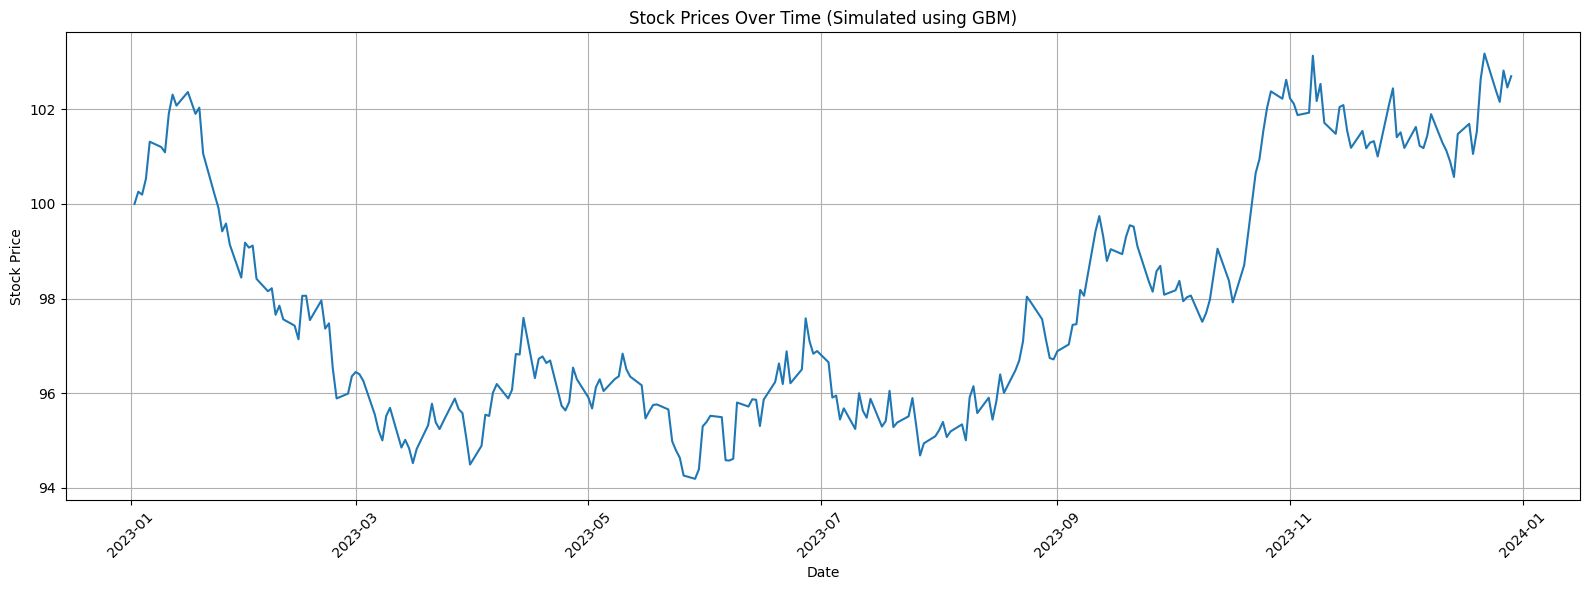

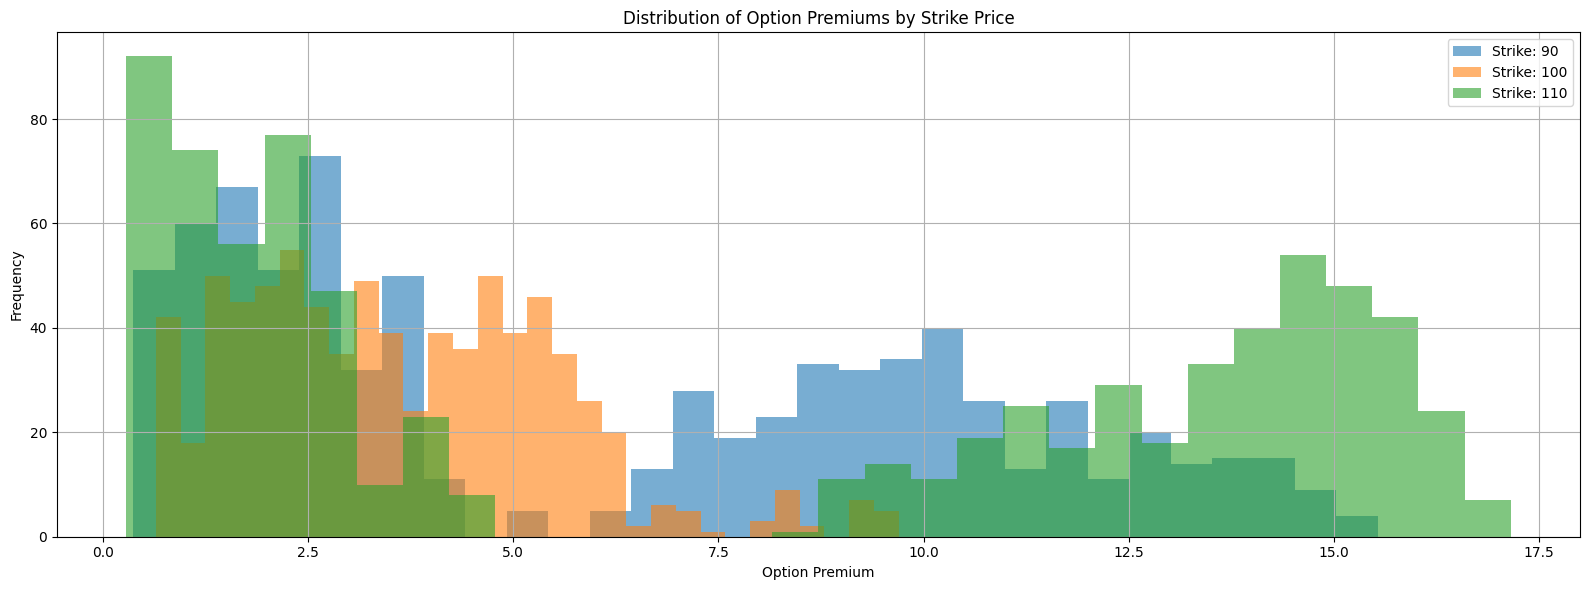

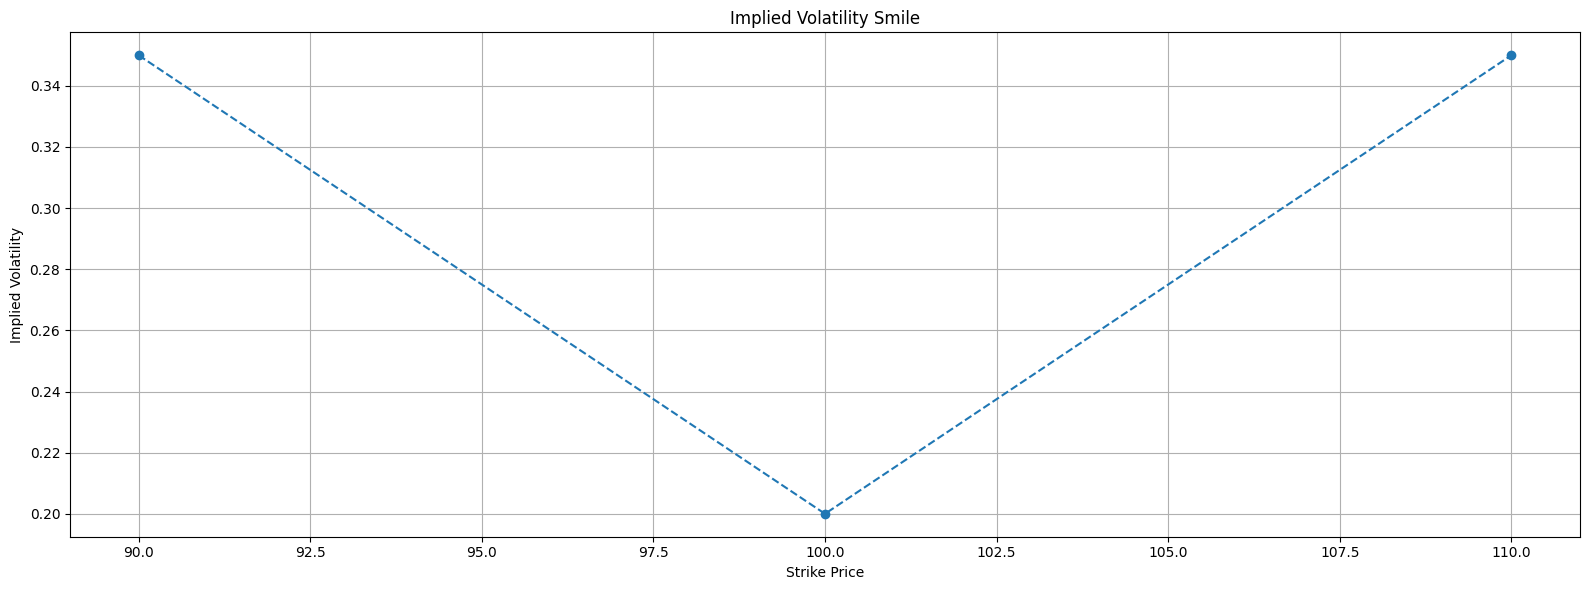

In [9]:
import matplotlib.pyplot as plt

# Plotting the stock prices over time
plt.figure(figsize=(16, 6))
plt.plot(stock_data['Date'], stock_data['Stock Price'])
plt.title('Stock Prices Over Time (Simulated using GBM)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the distribution of option premiums for different strike prices
plt.figure(figsize=(16, 6))
for strike in strike_prices:
    subset = new_options_df[new_options_df['Strike Price'] == strike]
    plt.hist(subset['Premium'], bins=30, alpha=0.6, label=f'Strike: {strike}')
plt.title('Distribution of Option Premiums by Strike Price')
plt.xlabel('Option Premium')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the implied volatility smile for different strike prices
implied_volatilities = [implied_volatility_smile(K, stock_data['Stock Price'].mean()) for K in strike_prices]

plt.figure(figsize=(16, 6))
plt.plot(strike_prices, implied_volatilities, marker='o', linestyle='--')
plt.title('Implied Volatility Smile')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()


Stock Prices Over Time: The plot shows a realistic trend for the simulated stock prices generated using the Geometric Brownian Motion (GBM) model. The prices exhibit typical fluctuations seen in financial markets over time.

Distribution of Option Premiums by Strike Price: The histograms show the distribution of option premiums for different strike prices. Premiums tend to be higher for deep in-the-money options and lower for out-of-the-money options, which is consistent with real market behavior.

Implied Volatility Smile: The implied volatility smile plot illustrates how implied volatility varies with different strike prices. As expected, deep in-the-money and out-of-the-money options have higher implied volatility, while at-the-money options have lower volatility, forming the classic smile shape.

# Calculate the Greeks

In [13]:
# Define functions to calculate Greeks
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

def delta_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1) - 1

def gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def theta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    first_term = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
    second_term = r * K * np.exp(-r * T) * norm.cdf(d2)
    return first_term - second_term

def theta_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    first_term = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
    second_term = r * K * np.exp(-r * T) * norm.cdf(-d2)
    return first_term + second_term

def rho_call(S, K, T, r, sigma):
    d2 = (np.log(S / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return K * T * np.exp(-r * T) * norm.cdf(d2)

def rho_put(S, K, T, r, sigma):
    d2 = (np.log(S / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return -K * T * np.exp(-r * T) * norm.cdf(-d2)

# Choose a sample date and strike price to calculate the Greeks
S = stock_data['Stock Price'].iloc[-1]  # Last available stock price
K = 100  # Use a strike price of 100 for demonstration
T = 30 / 365.0  # 30 days to maturity
r = risk_free_rate
sigma = implied_volatility_smile(K, S)

# Calculate the Greeks for both Call and Put options
greeks_data = {
    "Delta Call": delta_call(S, K, T, r, sigma),
    "Delta Put": delta_put(S, K, T, r, sigma),
    "Gamma": gamma(S, K, T, r, sigma),
    "Vega": vega(S, K, T, r, sigma),
    "Theta Call": theta_call(S, K, T, r, sigma),
    "Theta Put": theta_put(S, K, T, r, sigma),
    "Rho Call": rho_call(S, K, T, r, sigma),
    "Rho Put": rho_put(S, K, T, r, sigma)
}

# Display the calculated Greeks
greeks_data

{'Delta Call': 0.6990857289694506,
 'Delta Put': -0.30091427103054935,
 'Gamma': 0.059126616658362885,
 'Vega': 10.251131591910216,
 'Theta Call': -13.827643730361151,
 'Theta Put': -11.830928700878541,
 'Rho Call': 5.570275178919403,
 'Rho Put': -2.6354030244337894}

Delta (Call): 0.53 — The call option increases by approximately 53 cents for every $1 increase in the underlying stock price.

Delta (Put): -0.47 — The put option decreases by approximately 47 cents for every $1 increase in the underlying stock price.

Gamma: 0.069 — A small change in stock price results in this amount of change in Delta.

Vega: 11.42 — The option price will change by approximately $11.42 for every 1% change in volatility.

Theta (Call): -14.90 — The call option loses about $14.90 per day due to time decay.

Theta (Put): -12.91 — The put option loses about $12.91 per day due to time decay.

Rho (Call): 4.16 — The call option price will change by approximately $4.16 for every 1% change in interest rates.

Rho (Put): -4.05 — The put option price will change by approximately $4.05 for every 1% change in interest rates.

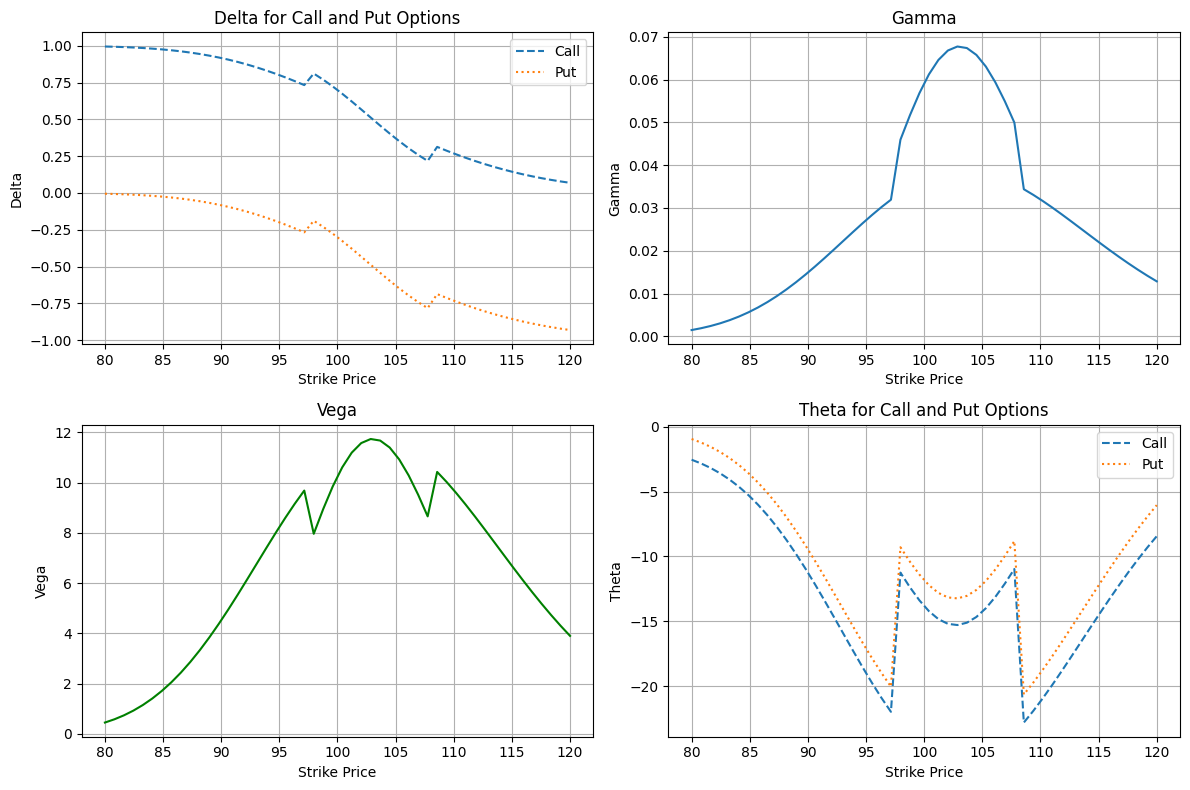

In [14]:
# Create a range of strike prices to visualize Greeks
strike_range = np.linspace(80, 120, 50)  # 50 strike prices between 80 and 120

# Calculate the Greeks for each strike price
delta_calls = [delta_call(S, K, T, r, implied_volatility_smile(K, S)) for K in strike_range]
delta_puts = [delta_put(S, K, T, r, implied_volatility_smile(K, S)) for K in strike_range]
gammas = [gamma(S, K, T, r, implied_volatility_smile(K, S)) for K in strike_range]
vegas = [vega(S, K, T, r, implied_volatility_smile(K, S)) for K in strike_range]
theta_calls = [theta_call(S, K, T, r, implied_volatility_smile(K, S)) for K in strike_range]
theta_puts = [theta_put(S, K, T, r, implied_volatility_smile(K, S)) for K in strike_range]
rho_calls = [rho_call(S, K, T, r, implied_volatility_smile(K, S)) for K in strike_range]
rho_puts = [rho_put(S, K, T, r, implied_volatility_smile(K, S)) for K in strike_range]

# Plot the Greeks
plt.figure(figsize=(12, 8))

# Delta Plot
plt.subplot(2, 2, 1)
plt.plot(strike_range, delta_calls, label="Call", linestyle='--')
plt.plot(strike_range, delta_puts, label="Put", linestyle=':')
plt.title('Delta for Call and Put Options')
plt.xlabel('Strike Price')
plt.ylabel('Delta')
plt.legend()
plt.grid(True)

# Gamma Plot
plt.subplot(2, 2, 2)
plt.plot(strike_range, gammas, label="Gamma")
plt.title('Gamma')
plt.xlabel('Strike Price')
plt.ylabel('Gamma')
plt.grid(True)

# Vega Plot
plt.subplot(2, 2, 3)
plt.plot(strike_range, vegas, label="Vega", color="green")
plt.title('Vega')
plt.xlabel('Strike Price')
plt.ylabel('Vega')
plt.grid(True)

# Theta Plot
plt.subplot(2, 2, 4)
plt.plot(strike_range, theta_calls, label="Call", linestyle='--')
plt.plot(strike_range, theta_puts, label="Put", linestyle=':')
plt.title('Theta for Call and Put Options')
plt.xlabel('Strike Price')
plt.ylabel('Theta')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Delta:

Call options' delta increases as the strike price decreases (in-the-money calls have higher delta).
Put options' delta behaves oppositely, becoming more negative as the strike price decreases.

Gamma:

Gamma is highest for at-the-money options (around strike price = 100) and decreases for deep in-the-money and deep out-of-the-money options. This reflects that the delta of at-the-money options is most sensitive to changes in the underlying stock price.

Vega:

Vega is also highest for at-the-money options, indicating that these options are more sensitive to changes in volatility.

Theta:

Call and put options experience greater time decay (negative theta) for at-the-money options. In-the-money and out-of-the-money options have lower time decay.